<a href="https://colab.research.google.com/github/kavivino2620-alt/k-means-/blob/main/K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

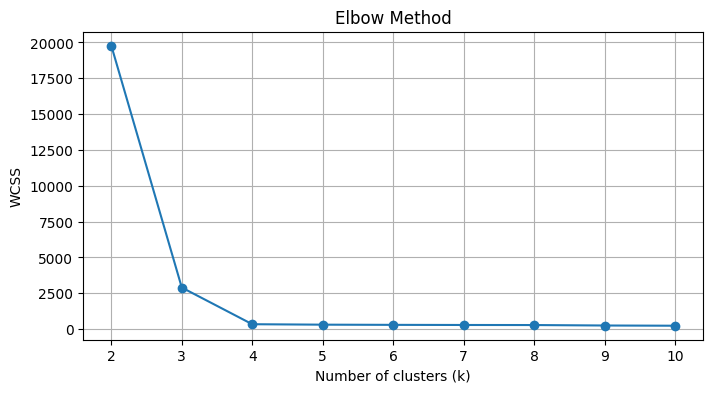

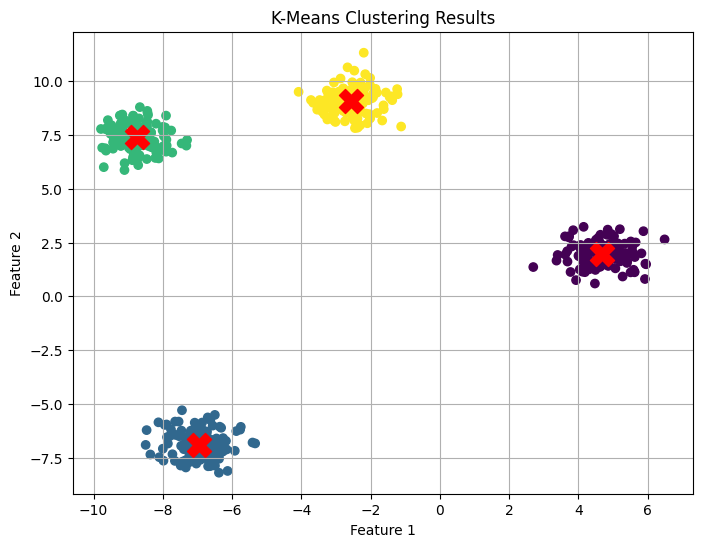

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Step 1: Generate synthetic data
X, y_true = make_blobs(n_samples=500, centers=4, cluster_std=0.60, random_state=42)

# Step 2: K-Means implementation
class KMeansScratch:
    def __init__(self, k=4, max_iters=100, tolerance=1e-4):
        self.k = k
        self.max_iters = max_iters
        self.tolerance = tolerance

    def initialize_centroids(self, X):
        np.random.seed(42)
        random_idx = np.random.permutation(X.shape[0])[:self.k]
        return X[random_idx]

    def compute_distance(self, X, centroids):
        return np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)

    def assign_clusters(self, distances):
        return np.argmin(distances, axis=1)

    def update_centroids(self, X, labels):
        return np.array([X[labels == i].mean(axis=0) for i in range(self.k)])

    def fit(self, X):
        self.centroids = self.initialize_centroids(X)
        for _ in range(self.max_iters):
            distances = self.compute_distance(X, self.centroids)
            labels = self.assign_clusters(distances)
            new_centroids = self.update_centroids(X, labels)
            if np.all(np.abs(new_centroids - self.centroids) < self.tolerance):
                break
            self.centroids = new_centroids
        self.labels = labels

    def predict(self, X):
        distances = self.compute_distance(X, self.centroids)
        return self.assign_clusters(distances)

# Step 3: Apply K-Means
kmeans = KMeansScratch(k=4)
kmeans.fit(X)

# Step 4: Elbow Method
wcss = []
for k in range(2, 11):
    km = KMeansScratch(k=k)
    km.fit(X)
    wcss.append(np.sum((X - km.centroids[km.labels])**2))

plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# Step 5: Final cluster visualization
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels, cmap='viridis')
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], s=300, c='red', marker='X')
plt.title('K-Means Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()